In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [8]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.



In [9]:
chicago_df = pd.concat([chicago_df_1 , chicago_df_2 , chicago_df_3 , chicago_df_4],ignore_index=False , axis = 0)

In [30]:
chicago_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [ ]:
chicago_df.tail(20)

In [12]:
chicago_df.shape

(912502, 23)

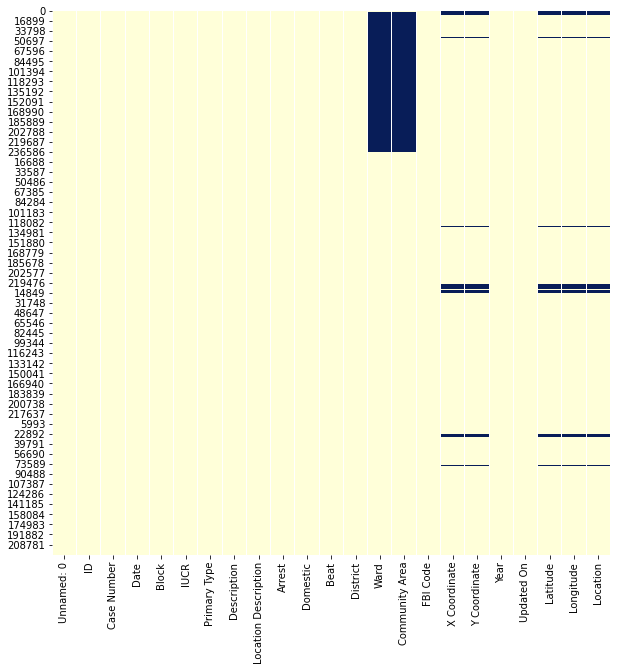

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [16]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True,axis=1) 

In [ ]:
chicago_df.head(10)

In [31]:
chicago_df.Date = pd.to_datetime(chicago_df.Date,errors = 'ignore', yearfirst=True )

In [ ]:
chicago_df.head(10)

In [ ]:
chicago_df.tail(10)


In [36]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [37]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...,...
2012-06-14 09:00:00,8663721,2012-06-14 09:00:00,069XX S PEORIA ST,THEFT,$500 AND UNDER,STREET,False,False
2012-06-17 01:30:00,8663723,2012-06-17 01:30:00,026XX W PETERSON AVE,THEFT,OVER $500,RESTAURANT,False,False
2012-06-15 01:45:00,8663725,2012-06-15 01:45:00,020XX E 71ST ST,ROBBERY,ARMED: HANDGUN,STREET,False,False


In [38]:
chicago_df['Primary Type'].value_counts()

THEFT                                185199
BATTERY                              173441
CRIMINAL DAMAGE                      107736
NARCOTICS                             97879
ASSAULT                               57884
OTHER OFFENSE                         56962
BURGLARY                              49440
MOTOR VEHICLE THEFT                   43904
ROBBERY                               32603
DECEPTIVE PRACTICE                    32019
CRIMINAL TRESPASS                     25912
PROSTITUTION                           9956
WEAPONS VIOLATION                      8721
PUBLIC PEACE VIOLATION                 6538
OFFENSE INVOLVING CHILDREN             6046
SEX OFFENSE                            3734
CRIM SEXUAL ASSAULT                    3647
LIQUOR LAW VIOLATION                   2220
INTERFERENCE WITH PUBLIC OFFICER       1838
GAMBLING                               1811
ARSON                                  1570
HOMICIDE                               1385
KIDNAPPING                      

In [43]:
x = chicago_df['Primary Type'].value_counts().iloc[:20].index


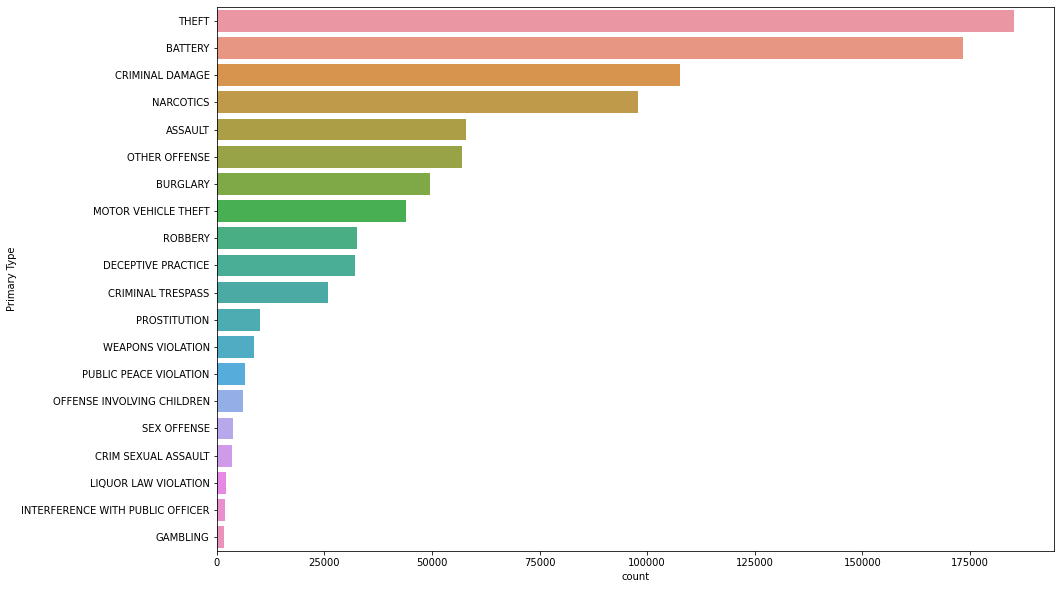

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Primary Type',data = chicago_df , order = x)

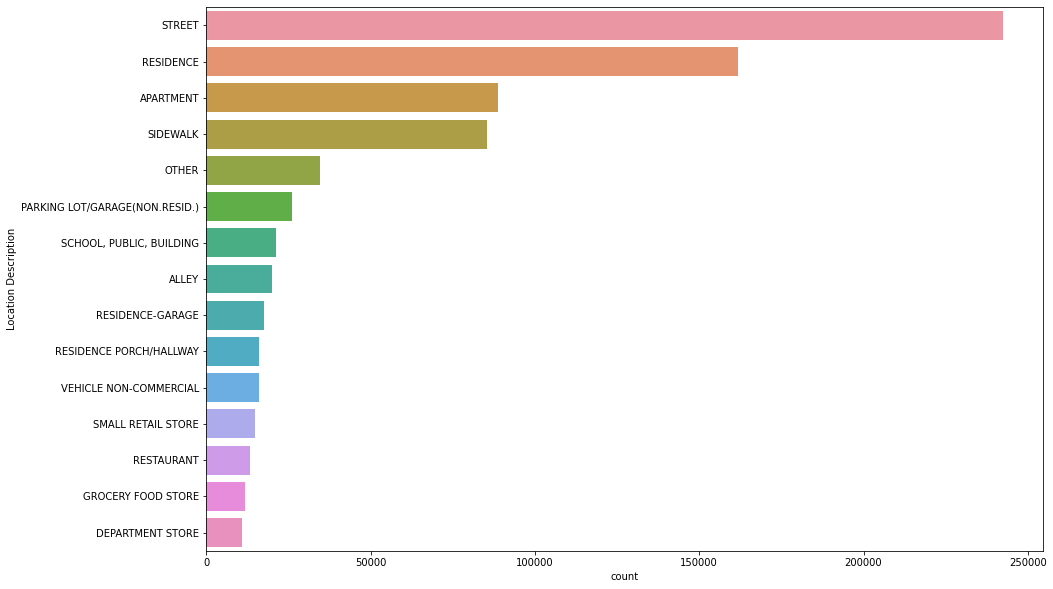

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Location Description',data = chicago_df , order =chicago_df['Location Description'].value_counts().iloc[:15].index )

In [55]:
chicago_df.resample('Y').size()

Date
2001-12-31    230176
2002-12-31      4435
2003-12-31       979
2004-12-31      1207
2005-12-31      1686
2006-12-31    219840
2007-12-31         0
2008-12-31    220293
2009-12-31      6222
2010-12-31      1493
2011-12-31       535
2012-12-31    149045
2013-12-31      1946
2014-12-31      4151
2015-12-31     47454
2016-12-31     23040
Freq: A-DEC, dtype: int64

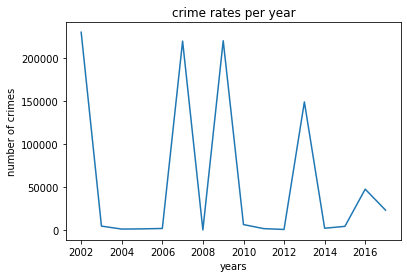

In [52]:
plt.plot(chicago_df.resample('Y').size())
plt.title('crime rates per year')
plt.xlabel('years')
plt.ylabel('number of crimes')
plt.show()

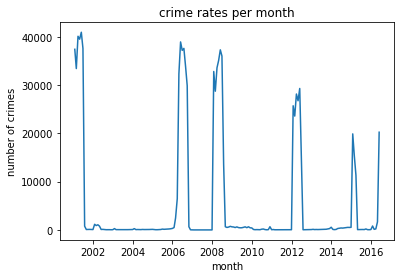

In [56]:
plt.plot(chicago_df.resample('m').size())
plt.title('crime rates per month')
plt.xlabel('month')
plt.ylabel('number of crimes')
plt.show()

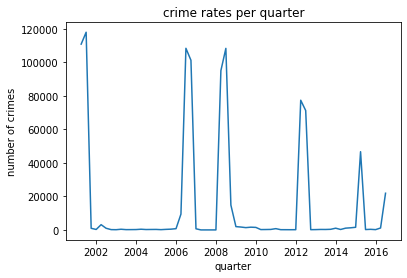

In [57]:
plt.plot(chicago_df.resample('Q').size())
plt.title('crime rates per quarter')
plt.xlabel('quarter')
plt.ylabel('number of crimes')
plt.show()

In [58]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [59]:
chicago_prophet

,Date,0
0,2001-01-31,37404
1,2001-02-28,33417
2,2001-03-31,40102
3,2001-04-30,39500
4,2001-05-31,40938
...,...,...
180,2016-01-31,809
181,2016-02-29,123
182,2016-03-31,213
183,2016-04-30,1663


In [60]:
chicago_prophet.columns = ['Date','Crime Count']
chicago_prophet

,Date,Crime Count
0,2001-01-31,37404
1,2001-02-28,33417
2,2001-03-31,40102
3,2001-04-30,39500
4,2001-05-31,40938
...,...,...
180,2016-01-31,809
181,2016-02-29,123
182,2016-03-31,213
183,2016-04-30,1663


In [61]:
chicago_prophet_final = chicago_prophet.rename(columns = {'Date':'ds', 'Crime Count':'y'})

In [62]:
chicago_prophet_final

,ds,y
0,2001-01-31,37404
1,2001-02-28,33417
2,2001-03-31,40102
3,2001-04-30,39500
4,2001-05-31,40938
...,...,...
180,2016-01-31,809
181,2016-02-29,123
182,2016-03-31,213
183,2016-04-30,1663


In [63]:
m = Prophet()
m.fit(chicago_prophet_final)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
future = m.make_future_dataframe(periods=730)
forecast = m.predict(future)

In [68]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,7823.482191,-3999.771091,22896.432457,7823.482191,7823.482191,1890.673626,1890.673626,1890.673626,1890.673626,1890.673626,1890.673626,0.0,0.0,0.0,9714.155816
1,2001-02-28,7792.343587,-5679.974466,23681.986815,7792.343587,7792.343587,1642.906498,1642.906498,1642.906498,1642.906498,1642.906498,1642.906498,0.0,0.0,0.0,9435.250085
2,2001-03-31,7757.868705,-3323.303259,24212.074478,7757.868705,7757.868705,2601.673775,2601.673775,2601.673775,2601.673775,2601.673775,2601.673775,0.0,0.0,0.0,10359.542480
3,2001-04-30,7724.505915,-2364.527404,25466.786768,7724.505915,7724.505915,3572.706583,3572.706583,3572.706583,3572.706583,3572.706583,3572.706583,0.0,0.0,0.0,11297.212498
4,2001-05-31,7690.031033,-543.782436,27319.284915,7690.031033,7690.031033,5529.587191,5529.587191,5529.587191,5529.587191,5529.587191,5529.587191,0.0,0.0,0.0,13219.618224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2018-05-27,1559.786165,-7507.315850,20244.630938,1552.984431,1566.506109,4421.443667,4421.443667,4421.443667,4421.443667,4421.443667,4421.443667,0.0,0.0,0.0,5981.229831
911,2018-05-28,1558.813040,-6832.525752,19365.891511,1551.998730,1565.548390,4672.998467,4672.998467,4672.998467,4672.998467,4672.998467,4672.998467,0.0,0.0,0.0,6231.811507
912,2018-05-29,1557.839915,-7121.062824,19626.640897,1551.013005,1564.590672,4933.973832,4933.973832,4933.973832,4933.973832,4933.973832,4933.973832,0.0,0.0,0.0,6491.813747
913,2018-05-30,1556.866790,-7081.480530,21284.352591,1550.027392,1563.632953,5199.486109,5199.486109,5199.486109,5199.486109,5199.486109,5199.486109,0.0,0.0,0.0,6756.352899


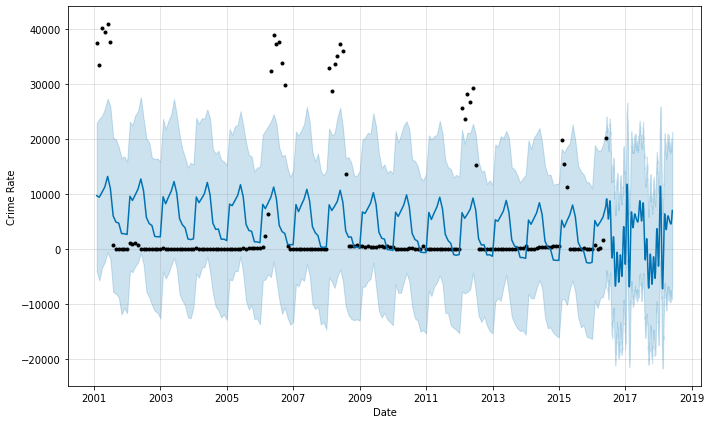

In [69]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

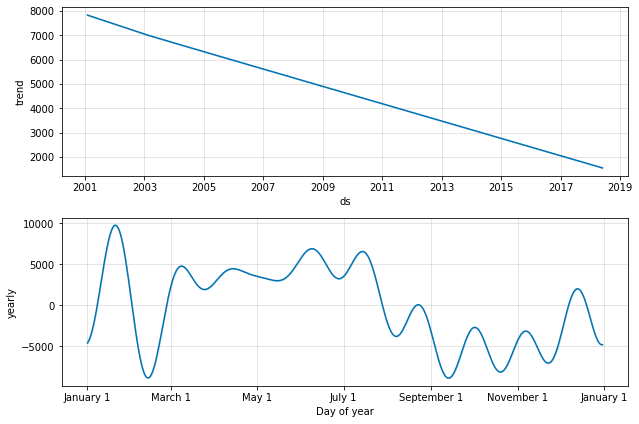

In [70]:
figure3 = m.plot_components(forecast)